In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


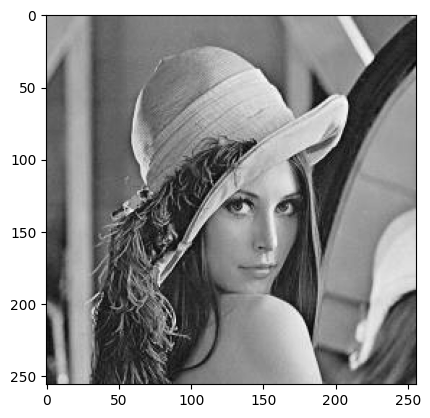

In [3]:
img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

glmg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(glmg.shape)
plt.imshow(glmg, cmap='gray')

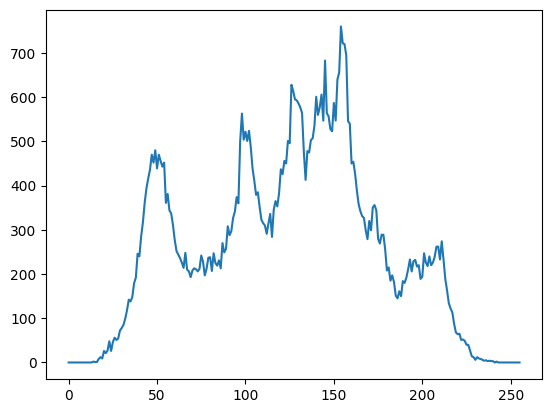

In [4]:
hist = cv2.calcHist([glmg], [0], None, [256], [0, 256])
plt.plot(hist)

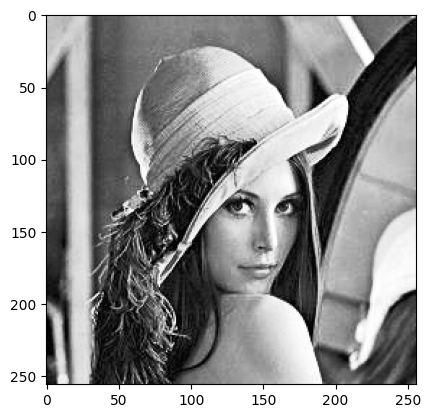

In [5]:
gout = cv2.equalizeHist(glmg)
plt.imshow(gout, cmap='gray')

(256, 1)


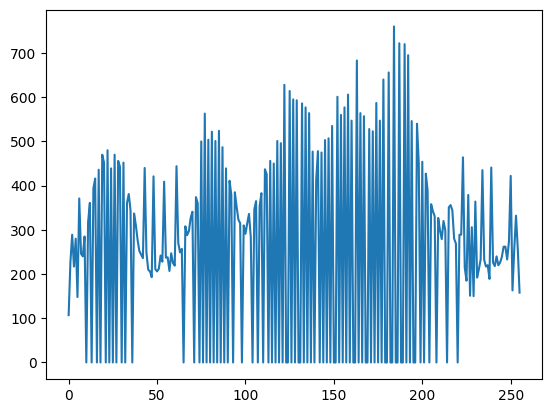

In [7]:
hist = cv2.calcHist([gout], [0], None, [256], [0, 256])
plt.plot(hist)
print(hist.shape)

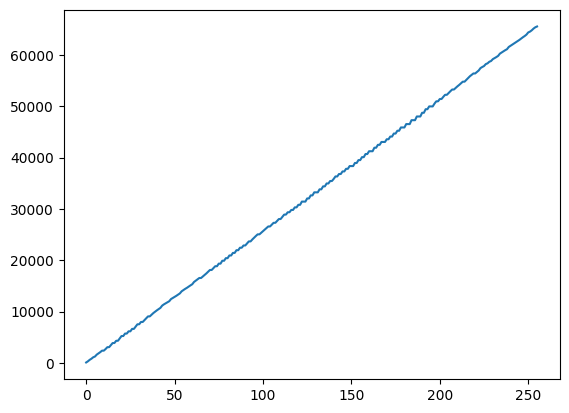

In [8]:
cumuHist = hist.copy()

for  i in range(1, 256):
  cumuHist[i] = cumuHist[i-1] + hist[i]

plt.plot(cumuHist)

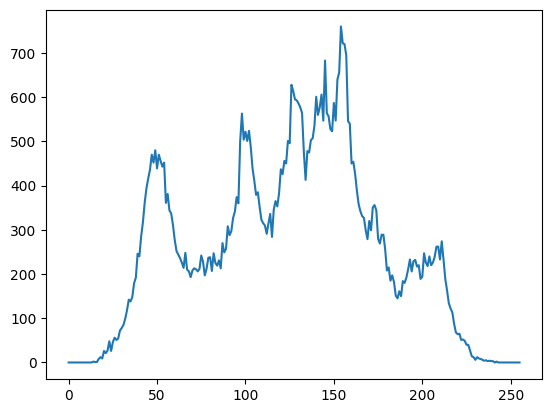

In [9]:
hist = cv2.calcHist([glmg], [0], None, [256], [0, 256])
plt.plot(hist)

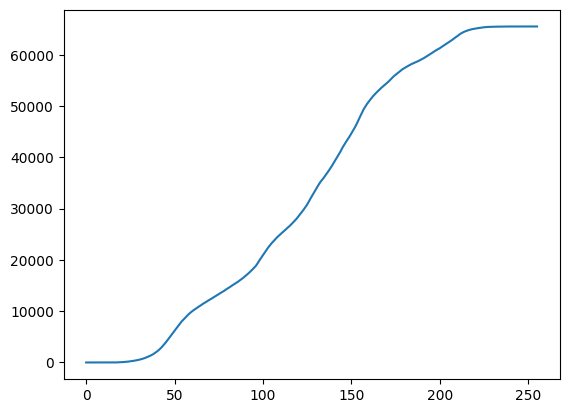

In [10]:
cumuHist = hist.copy()

for  i in range(1, 256):
  cumuHist[i] = cumuHist[i-1] + hist[i]

plt.plot(cumuHist)

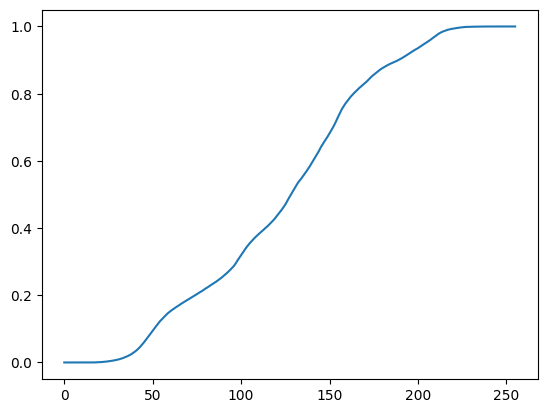

In [11]:
equalhist = cumuHist.copy()

numOfPixels =  np.int32(glmg.shape[0] * glmg.shape[1])

equalhist = equalhist/numOfPixels

plt.plot(equalhist)

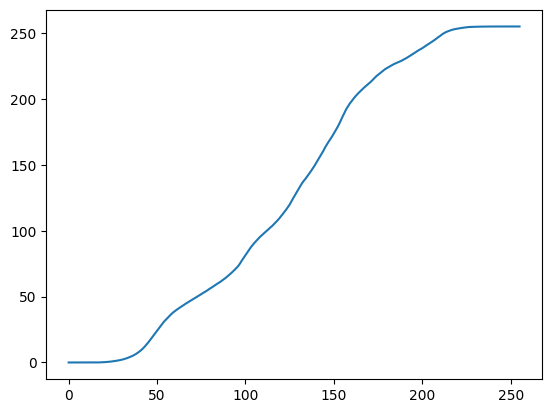

In [12]:
equalhist = equalhist * 255

plt.plot(equalhist)

<ipython-input-14-f55e6f3e48d9>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gout[h, w] = equalhist[glmg[h, w]]


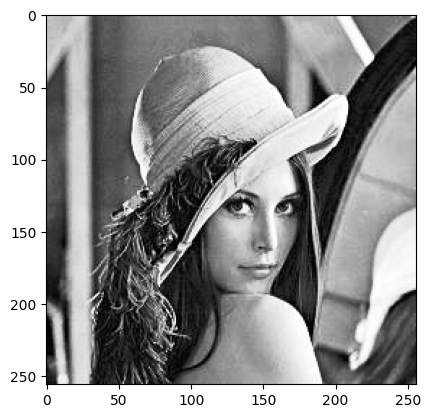

In [14]:
gout = glmg.copy()

for h in range(glmg.shape[0]):
  for w in range(glmg.shape[1]):
    gout[h, w] = equalhist[glmg[h, w]]

plt.imshow(gout, cmap='gray')

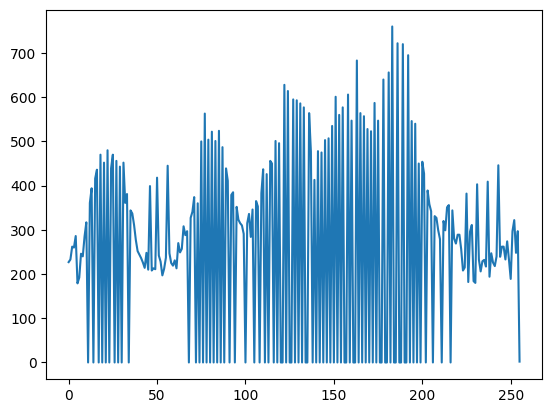

In [15]:
hist = cv2.calcHist([gout], [0], None, [256], [0, 256])
plt.plot(hist)

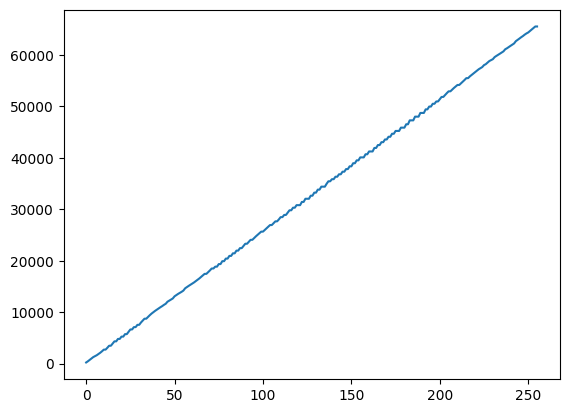

In [16]:
cumuHist = hist.copy()

for  i in range(1, 256):
  cumuHist[i] = cumuHist[i-1] + hist[i]

plt.plot(cumuHist)